In [16]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/kaggle/input/job-placement-dataset/Job_Placement_Data.csv')
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


<AxesSubplot:>

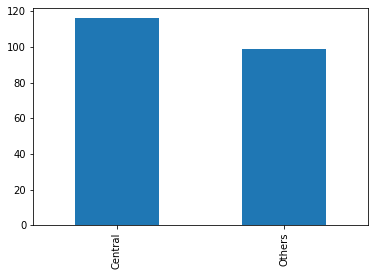

In [5]:
data.ssc_board.value_counts().plot(kind = 'bar')

In [6]:
data.undergrad_degree.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: undergrad_degree, dtype: int64

In [21]:
def preprocessing_inputs(df):
    df = df.copy()
    df['gender'].replace(['M','F'], [0,1],inplace=True)
    df['ssc_board'].replace(['Others','Central'], [0,1],inplace=True)
    df['hsc_board'].replace(['Others','Central'], [0,1],inplace=True)
    df['status'].replace(['Placed','Not Placed'], [1,0],inplace=True)
    df['work_experience'].replace(['No','Yes'], [0,1],inplace=True)
    for column in ['hsc_subject', 'undergrad_degree', 'specialisation']:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    X = df.drop('status', axis = 1)
    y = df.status

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = preprocessing_inputs(data)
X_train

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,mba_percent,hsc_subject_Arts,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Comm&Mgmt,undergrad_degree_Others,undergrad_degree_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
198,1.372813,-0.033107,0.960769,0.353438,1.314257,-0.111506,-0.696526,1.173063,1.747467,-0.252646,0.948016,-0.839372,-1.435697,3.958114,-0.603023,-1.083473,1.083473
82,-0.728431,-0.396059,0.960769,0.086020,1.314257,1.087196,-0.696526,0.714007,-0.285087,-0.252646,0.948016,-0.839372,0.696526,-0.252646,-0.603023,0.922958,-0.922958
65,-0.728431,-1.212701,-1.040833,-1.696772,-0.760886,-1.177019,-0.696526,1.302364,-0.874386,-0.252646,-1.054835,1.191367,0.696526,-0.252646,-0.603023,-1.083473,1.083473
109,-0.728431,-1.394177,0.960769,-0.270539,-0.760886,-0.111506,1.435697,1.020045,-1.052587,-0.252646,-1.054835,1.191367,-1.435697,-0.252646,1.658312,-1.083473,1.083473
182,-0.728431,-1.394177,-1.040833,-0.092259,-0.760886,-1.177019,1.435697,0.178440,-0.396242,3.958114,-1.054835,-0.839372,-1.435697,3.958114,-0.603023,0.922958,-0.922958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.728431,-0.570276,-1.040833,-1.429353,-0.760886,-1.576586,-0.696526,-0.127597,0.641207,-0.252646,-1.054835,1.191367,-1.435697,-0.252646,1.658312,0.922958,-0.922958
14,-0.728431,-0.486797,0.960769,-1.696772,1.314257,-2.109342,-0.696526,0.254950,-1.251961,-0.252646,0.948016,-0.839372,0.696526,-0.252646,-0.603023,-1.083473,1.083473
92,1.372813,-0.647404,0.960769,0.264299,1.314257,0.021683,-0.696526,-0.051088,-0.456231,-0.252646,-1.054835,1.191367,0.696526,-0.252646,-0.603023,0.922958,-0.922958
179,1.372813,0.946863,0.960769,-0.181399,1.314257,-0.218057,-0.696526,0.216695,1.779225,-0.252646,-1.054835,1.191367,-1.435697,-0.252646,1.658312,-1.083473,1.083473


In [23]:
y_train

198    0
82     0
65     0
109    0
182    0
      ..
106    0
14     0
92     1
179    0
102    1
Name: status, Length: 150, dtype: int64

In [27]:
# {column: len(X[column].unique()) for column in X.select_dtypes('object').columns}.keys()

In [25]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier(),
    "                              CatBoost": CatBoostClassifier(verbose=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.
                              CatBoost trained.


In [26]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 83.08%
                   K-Nearest Neighbors: 70.77%
                         Decision Tree: 84.62%
Support Vector Machine (Linear Kernel): 86.15%
   Support Vector Machine (RBF Kernel): 75.38%
                        Neural Network: 78.46%
                         Random Forest: 80.00%
                     Gradient Boosting: 81.54%
                               XGBoost: 81.54%
                              LightGBM: 84.62%
                              CatBoost: 80.00%
